In [4]:
import h5py
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')
%matplotlib qt

In [5]:
f = h5py.File("NLO_3B.h5")

In [6]:
list(f)

['A',
 'alphas',
 'cij',
 'coulombPotential',
 'fourBodyPotential',
 'harmonicTrap',
 'isospins',
 'kinetic',
 'overlaps',
 'phiij',
 'radiusSquare',
 'spins',
 'threeBodyPotential',
 'threeBodyPotentialSpin',
 'twoBodyPotential',
 'u']

In [7]:
 #h = f['kinetic'][:] + f['coulombPotential'][:] + f["threeBodyPotential"][:] +f['twoBodyPotential'][:] 
alphas = f['alphas'][:] 
alphas.shape

(114, 3)

In [6]:
 #h = f['kinetic'][:] + f['coulombPotential'][:] + f["threeBodyPotential"][:] +f['twoBodyPotential'][:] 
matA = f['A'][:]

In [7]:
 #h = f['kinetic'][:] + f['coulombPotential'][:] + f["threeBodyPotential"][:] +f['twoBodyPotential'][:] 
k = f['kinetic'][:] 

In [8]:
 #h = f['kinetic'][:] + f['coulombPotential'][:] + f["threeBodyPotential"][:] +f['twoBodyPotential'][:] 
pot = f['twoBodyPotential'][:] 

In [10]:
s = f['overlaps'][:]
f.close()

In [15]:
ham = k+pot
print(ham)

[[4.12084647e-05 6.07688837e-05 1.65598897e-05]
 [6.07688837e-05 1.09739264e-04 1.88328214e-05]
 [1.65598897e-05 1.88328214e-05 1.04020785e-05]]


In [23]:
e,w = sp.linalg.eig(ham,s)
print(ham)
e

[[4.12084647e-05 6.07688837e-05 1.65598897e-05]
 [6.07688837e-05 1.09739264e-04 1.88328214e-05]
 [1.65598897e-05 1.88328214e-05 1.04020785e-05]]


array([4506.15446346+0.j, 1567.07876278+0.j,  491.15034553+0.j])

In [31]:
h = w.transpose()@ham@w
eh,wh = sp.linalg.eig(h)
eh

array([ 491.15034553+0.j, 1567.07876278+0.j, 4506.15446346+0.j])

In [26]:
es,ws = sp.linalg.eig(s)
w = ws/np.sqrt(es)

In [8]:
x = np.zeros((114,1))

In [11]:
plt.scatter(alphas[:,2],x)

In [14]:
y0 = 1/np.sqrt(alphas[:,0])
y1 = 1/np.sqrt(alphas[:,1])
y2 = 1/np.sqrt(alphas[:,2])

In [18]:
plt.scatter(y2,x)

In [1]:
r1 = np.sqrt(1/alphas[:,0])
plt.hist(r0, bins=20)

NameError: name 'np' is not defined

(array([76., 56., 22., 10.,  4.,  4.,  6.,  8.,  7., 12.,  7.,  7.,  8.,
         5.,  7.,  4., 11.,  9., 13.,  6.]),
 array([  2.61398955,  27.3639253 ,  52.11386105,  76.8637968 ,
        101.61373255, 126.3636683 , 151.11360405, 175.8635398 ,
        200.61347556, 225.36341131, 250.11334706, 274.86328281,
        299.61321856, 324.36315431, 349.11309006, 373.86302581,
        398.61296156, 423.36289731, 448.11283306, 472.86276881,
        497.61270456]),
 <a list of 20 Patch objects>)

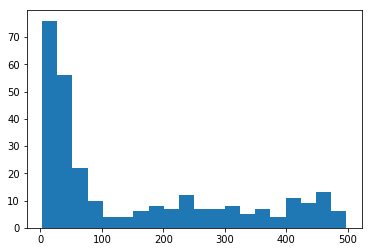

In [138]:
r2 = np.sqrt(1/alphas[:,1])
plt.hist(r2, bins=20)

(array([98., 34., 15.,  9., 11., 11.,  9.,  4.,  8.,  8.,  2., 10.,  5.,
         5.,  6., 10.,  5., 14.,  8., 10.]),
 array([  1.86793335,  26.67604095,  51.48414855,  76.29225615,
        101.10036375, 125.90847136, 150.71657896, 175.52468656,
        200.33279416, 225.14090177, 249.94900937, 274.75711697,
        299.56522457, 324.37333217, 349.18143978, 373.98954738,
        398.79765498, 423.60576258, 448.41387019, 473.22197779,
        498.03008539]),
 <a list of 20 Patch objects>)

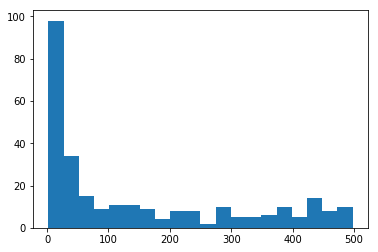

In [139]:
r3 = np.sqrt(1/alphas[:,2])
plt.hist(r3, bins=20)

In [32]:
A = f['A'][:]

ValueError: Not a location (invalid object ID)

In [9]:
c = f['cij'][:]

In [10]:
D, V = sp.linalg.eig(h,s)

In [11]:
f.close()

In [12]:
min(D)

(-0.0034755435574580448+0j)

In [13]:
idx = np.argmin(D)

In [14]:
idx

59

In [15]:
e = D[idx]
psi = V[:,idx]
print(e*41.47)

(-0.1441307913277851+0j)


In [16]:
np.max(np.abs(np.matmul(h,psi)-e*np.matmul(s,psi)))

2.0587507606251165e-05

In [17]:
np.matmul(psi,psi)

0.9999999999999999

In [18]:
x = np.linspace(0,20,100)
wf = np.zeros(x.size)
for i in range(alphas.size) :
        wf += psi[i]*np.exp(-0.5*alphas[i]*pow(x,2)) * x


ValueError: operands could not be broadcast together with shapes (3,) (100,) 

In [19]:
norma = np.matmul(psi,np.matmul(psi,s))

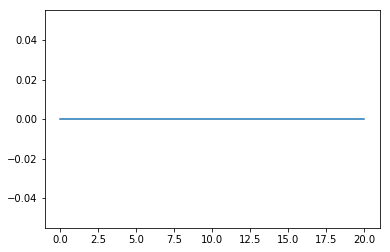

In [20]:
plt.plot(x,wf)

In [21]:
sum = 0
for i in range(x.size) :
    sum += wf[i]**2*(x[1]-x[0])
print(sum)

0.0


In [22]:
sum = 0
for i in range(x.size) :
    sum += x[i]**2*wf[i]**2*(x[1]-x[0])/norma
print(np.sqrt(sum)/2)

0.0


In [23]:
print(norma)

212302.62330374777


In [24]:
r2 =np.matmul(psi,np.matmul(r,psi))/norma

In [25]:
np.sqrt(r2)/2

5.4455536459684435

In [27]:
type(s)
sm=np.matrix(s)
cm=np.matrix(c.transpose())
type(sm)
cm[:,1]
uno=cm.transpose()*s*cm
print(uno.diagonal())
hm = np.matrix(h)

[[1.         1.00000002 1.00000004 1.00000787 1.00001833 0.99999977
  1.00020866 1.00003708 1.00040823 1.0000205  0.99992515 1.00008031
  1.00060339 1.00022409 1.00012563 0.99988827 0.99990345 1.00079722
  0.99973014 1.0001476  0.99997952 0.99992289 1.00054558 0.99933746
  1.00003988 0.99981947 1.000234   1.0000997  0.99973813 0.99999685
  1.00015105 0.9991477  0.99983996 0.9998532  1.00014568 0.99984015
  1.00009098 0.99856031 0.99998094 0.99994918 0.99981723 0.9999859
  0.99941079 1.00008118 0.99938297 0.99951248 0.99967303 0.9997752
  0.99990052 1.00005249 0.99993675 0.99998935 1.00020592 0.99839535
  1.00001179 0.9999234  0.99995169 0.99981449 0.99983025 1.00025145
  1.0000438  0.99970482 0.99979115 0.99913749 0.99993492 0.99994227
  0.99981313 0.9998789  0.99987898 1.0000156  0.99997797 1.00000018
  1.0000056  0.99959162 0.99986939 0.99991139 1.00002642 0.99989263
  1.00044629 1.00013474 0.99994089 0.99969887 1.00002783 0.99993802
  1.00001917 1.00013235 0.99981793 0.99999649 1.00

In [28]:
cm[:,0].transpose()*hm*cm[:,0]

matrix([[-0.00342171]])

In [29]:
x = np.linspace(0,10,1000)
func = np.zeros(x.size)
for i in range(alphas.size) :
        func += cm[i,0]*x*np.exp(-0.5*alphas[i]*np.power(x,2))

ValueError: operands could not be broadcast together with shapes (3,) (1000,) 

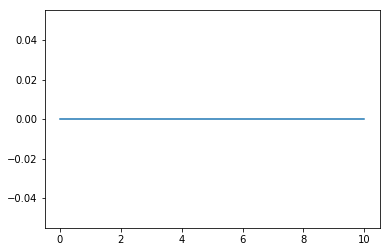

In [30]:
plt.plot(x,func)

In [31]:
rm = np.matrix(r)
cm[:,0].transpose()*rm*cm[:,0]

matrix([[137.06064931]])